# Diabetes Outcome Analysis

**Name**: Noah

**Date**: 3/29/2025


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: 
(2 pts) Load the dataset “diabetes.csv”, view the dimensions of the data, and gather summary statistics. Comment on your observations about the data.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

df = pd.read_csv("diabetes.csv")
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The data contains many components such as BP, Insulin, BMI, Age etc. These are very valuable for comparisons as well as building a model in the future for predictions. There are 0.0000... in the dataset which cannot correlate to certain components like Glucose or Insulin, therefore they are NULL.

## Question 2: 
(5 pts) Create two visualizations that demonstrate univariate and/or pairwise patterns in the data. Comment on the patterns.


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.02, 'Pairwise Plot - Blood Pressure and BMI')

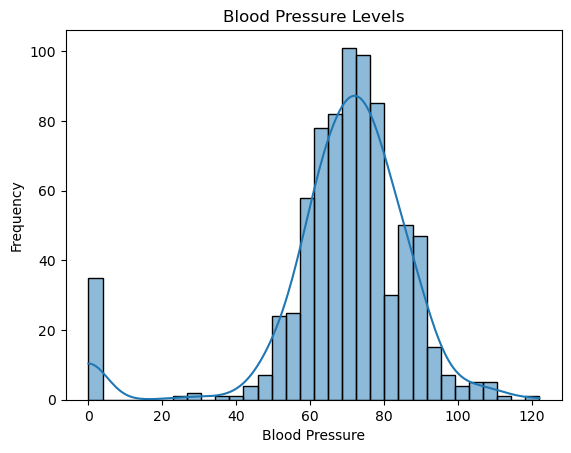

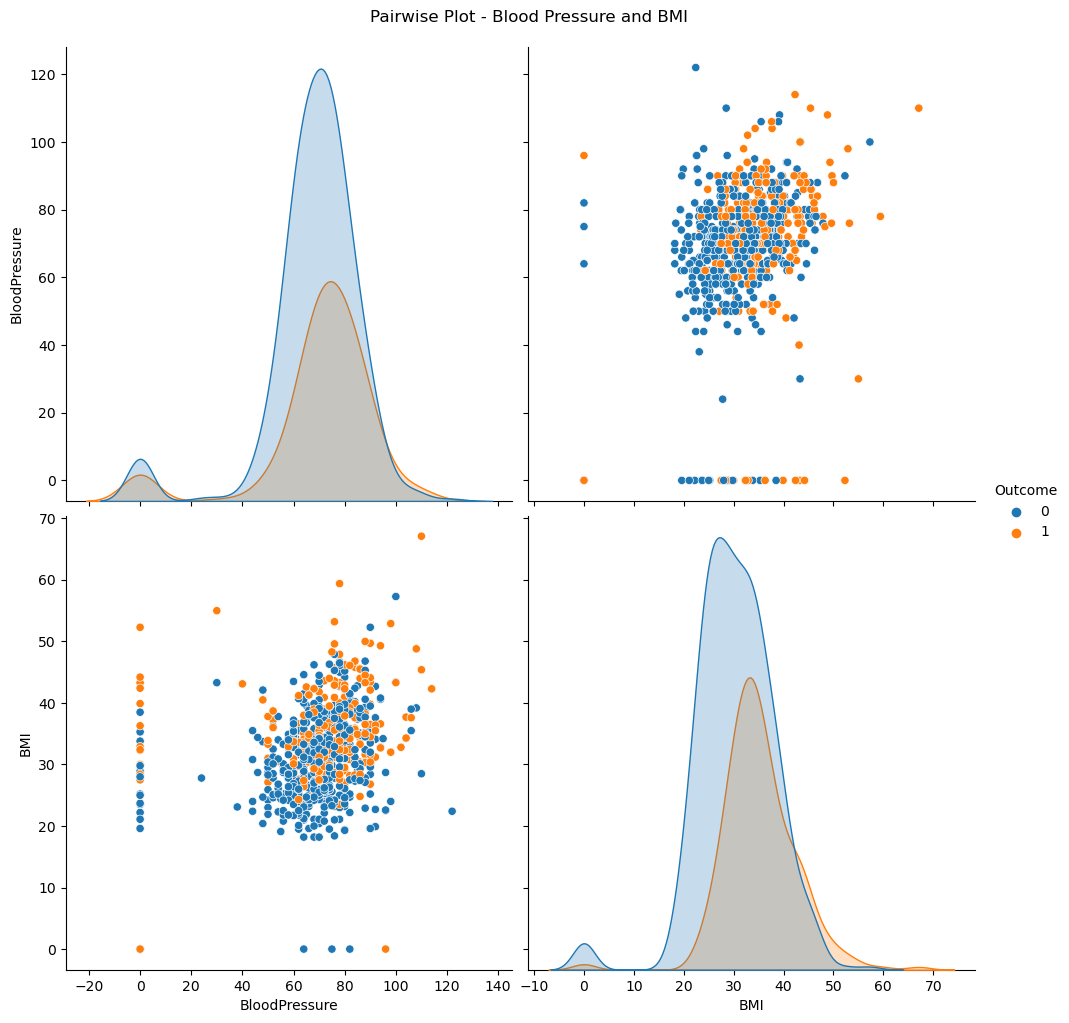

In [2]:
sns.histplot(df["BloodPressure"], kde=True)
plt.title("Blood Pressure Levels")
plt.xlabel("Blood Pressure")
plt.ylabel("Frequency")

sns.pairplot(df, vars=["BloodPressure", "BMI"], hue="Outcome", height=5)
plt.suptitle("Pairwise Plot - Blood Pressure and BMI", y=1.02)

The histogram showing the distribution of blood pressure levels in the dataset show that there are a large amount of values between 60 and 80. This is the most common values of blood pressure in the data set and correlates to the standard of blood pressure levels which is 120/80. There are some values of 0 in the blood pressure category that are due to NULL values, this may skew the histogram.

The pairwise graphs show the relationship between blood pressure and bmi. This shows that people with higher BMI will tend to have higher blood pressures. However, as it is seen in the graphs, lower BMI individuals can still have stable blood pressures.


## Question 3: 
(3 pts) Evaluate the data for missing or invalid values. Then prepare the data, and ensure that you handle missing and invalid values (if they exist).


In [3]:
print(df.isnull().sum())

col_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
not_usable = (df[col_with_zero] == 0).sum()
print(not_usable)

df[col_with_zero] = df[col_with_zero].replace(0, np.nan)
impute = SimpleImputer(strategy="median")
df[col_with_zero] = impute.fit_transform(df[col_with_zero])

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


This dataset has many missing values. More specifically lots of zeros in the skinthickness category. Completely removing these categories may affect the data, therefore the best action is to present this data through the median values.

## Question 4: 
(5 pts) Partition the data into train/test sets. After which, perform the following:
encode any categorical data
normalize numeric data.
Tip: Ensure that you use sklearn to normalize and/or encode the training data, after which transform the test set (there is an example in the lecture).


In [4]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

## Question 5: 
(10 pts) Build the model that predicts the target variable. Ensure that you:
Instantiate the correct SVM model, train and evaluate it.
Use GridSearchCV to tune at least two hyperparameters.**
Perform cross validation.
**You'll need to read the documentation of the SVM algorithm to identify the hyperparameters.
Display: 1) the best model/parameters and 2) the best score that was obtained.

In [5]:
parameters = {
    "C": [0.01, 0.1, 1, 10, 100, 1000],
    "gamma": [10, 1, 0.1, 0.01, 0.001, 0.0001]
}

model = SVC()

model = GridSearchCV(model, parameters, cv=5, return_train_score=True)
model.fit(X_train, y_train)

print("Parameters:", model.best_params_)
print("Score:", model.best_score_)


Parameters: {'C': 100, 'gamma': 0.001}
Score: 0.7857390100380754


## Question 6: 
(5 pts) Evaluate the scores from GridSearchCV for the training set and the test set to diagnose any bias-variance problems. Comment on the quality of the model.

In [6]:
table = pd.DataFrame(model.cv_results_)

table = table.sort_values("mean_test_score", ascending=False)

table[["mean_train_score", "std_train_score", "mean_test_score", "std_test_score"]].head()

,mean_train_score,std_train_score,mean_test_score,std_test_score
28,0.788637,0.006270,0.785739,0.031903
35,0.788637,0.008343,0.778280,0.037695
34,0.800272,0.007321,0.776411,0.036602
29,0.789103,0.006615,0.772776,0.024356
22,0.789568,0.006464,0.770907,0.022942


Between the train and test scores, there is very little difference or variance. What this means is that the model is good at predicting if an individual has diabetes. There is only decimal differences. Not only this but a low std_train_score of 0.006720 shows that there is consistency in the model's predictions. There is a mean accuracy above 78% which is good but could be better.

## Question 7: 
(15 pts) Perform the requirements from questions 5 & 6 above using 1) the k-nn algorithm and 2) any tree-based algorithm of your choice. Ensure that you explain your steps and discuss the quality of each model with respect to the bias-variance dilemma.

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# scale
scale = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

# knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scale, y_train)
knn_y = knn.predict(X_test_scale)

print(classification_report(y_test, knn_y))
print("KNN Accuracy:", accuracy_score(y_test, knn_y))

# tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
tree_y = tree.predict(X_test)

print(classification_report(y_test, tree_y))
print("Tree Accuracy:", accuracy_score(y_test, tree_y))


              precision    recall  f1-score   support

           0       0.79      0.83      0.81       150
           1       0.65      0.58      0.61        81

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

KNN Accuracy: 0.7445887445887446
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       150
           1       0.57      0.53      0.55        81

    accuracy                           0.70       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.70      0.69       231

Tree Accuracy: 0.696969696969697


When the tree model, svm, and knn model is compared it is evident that the svm model is the best at predicting diabetes as most mean accuracies is over 78%, not only that but the std across train and test is low which indicates consistency across the model. Second to this is the knn model with an accuracy score of 0.744 or 74%. The decision tree is the lowest with 69%. The decision tree had significantly lower f1 scores than knn or svm a it had 0.77 for class 0 and 0.55 for class 1. Therefore the best overall model is the svm model. In the medical industry I would advocate for the svm model, although the model itself needs a higher score than 78% mean accuracy. However, it is efficient in predicting diabetes and would be benefical for health proffessionals.